Ex 18_1 (5 points in total)：There are 12 complicated crossroads in this city. The numbers of car
accidents at the 12 crossroads within 1 month are as follows: 5, 5, 6, 0, 1, 2, 4, 4, 3, 5, 7, 10.

&emsp;(1) Please plot the log-likelihood function for mean number of car accidents within 1 month

In [1]:
X <- c(5, 5, 6, 0, 1, 2, 4, 4, 3, 5, 7, 10)
logli <- function(x, lambda){
    loglik <- 1
    for (i in 1:length(x)){
        loglik <- loglik * (((exp(-lambda))*(lambda^(X[i])))/factorial(X[i]))
    }
    loglik <- log(loglik)
    return(loglik)
}

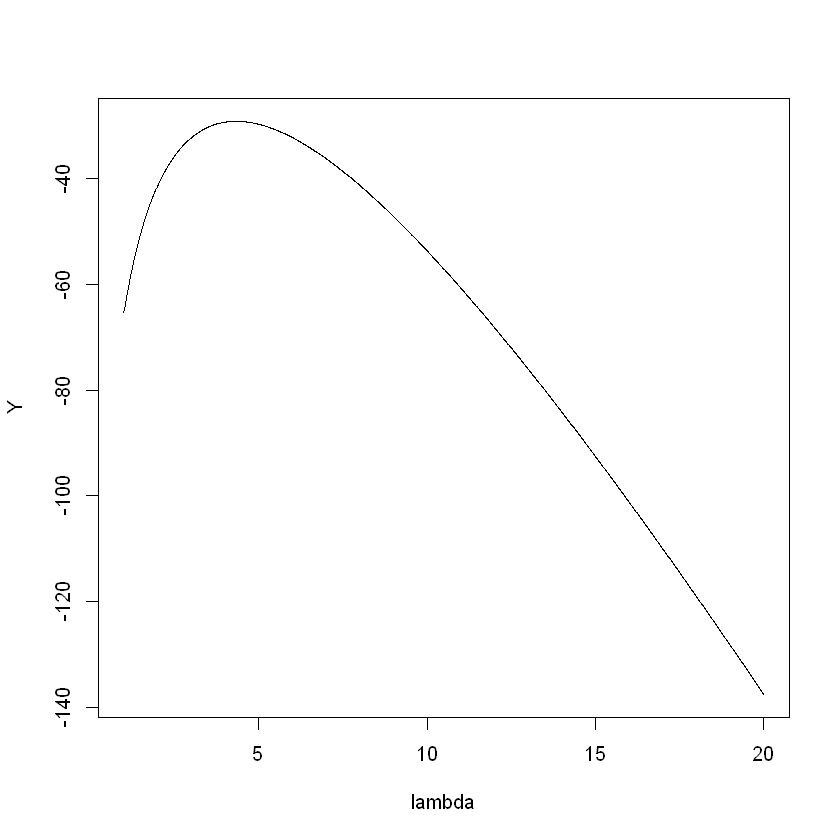

In [2]:
lambda <- seq(1,20,0.01)
Y <- logli(X,lambda)
plot(lambda,Y,type="l")

&emsp;(2) Please solve the maximum likelihood estimate (MLE) of
$\lambda$
by the Newton-Raphson method.
And mark the MLE on the above plot.
Requirements: please start from making a plot to decide an initial value (1 point), and then
define your function and use our newtonraphson (2 points)

In [3]:
newtonraphson <- function(ftn, x0, tol = 1e-9, max.iter = 5000) {
    x <- x0    
    fx <- ftn(x)     
    iter <- 0
    while ((abs(fx[1]) > tol) & (iter < max.iter)) {
        x <- x - fx[1]/fx[2]
        fx <- ftn(x)
        iter <- iter + 1
        cat("At iteration", iter, "value of x is:", x, "\n")
        }
    if (abs(fx[1]) > tol) {
    cat("Algorithm failed to converge\n")
    return(NULL)
    } else {  # abs(fx[1]) <= tol
    cat("Algorithm converged\n")
    return(x)
    }
}

In [4]:
ftn <- function(lambda){
    x <- c(5, 5, 6, 0, 1, 2, 4, 4, 3, 5, 7, 10)
    f <- (-length(x))
    df <- sum(x)*(-(lambda^(-2)))
    for (i in 1:length(x)){
        f <- f + x[i]/lambda
    }
    return(c(f,df))
    
}

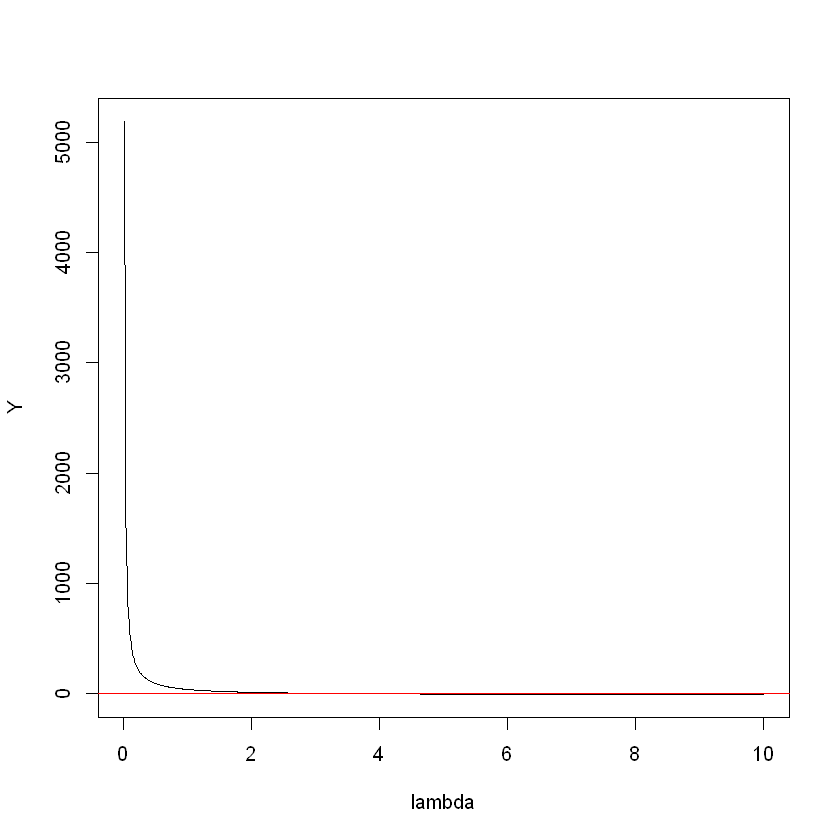

In [5]:
lambda <- seq(0,10,0.01)
Y <- (-length(X))+sum(X)/lambda
plot(lambda,Y,type="l")
abline(h=0,col=2)

In [6]:
newtonraphson(ftn,5)

At iteration 1 value of x is: 4.230769 
At iteration 2 value of x is: 4.330906 
At iteration 3 value of x is: 4.333332 
At iteration 4 value of x is: 4.333333 
Algorithm converged


[1] 4.333333

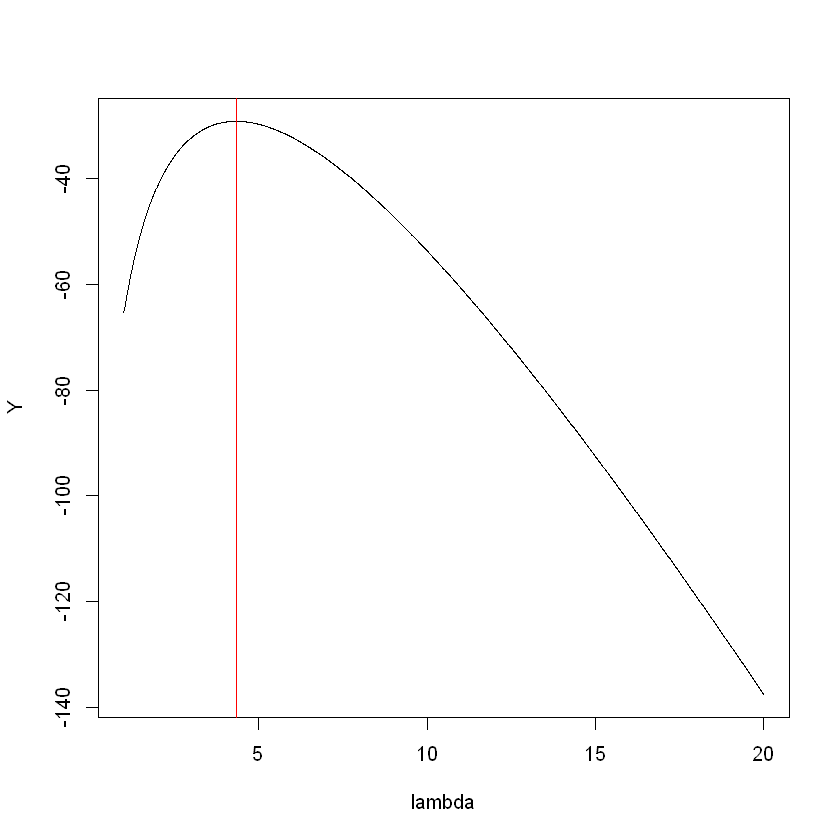

In [7]:
lambda <- seq(1,20,0.01)
Y <- logli(X,lambda)
plot(lambda,Y,type="l")
abline(v=4.333333,col=2)

---

Ex S5_1 (5 points in total): Data: BMIrepeated.csv on NTU COOL (Week 4). Please use “SEX”, “AGE”,
“Treatment” as predictors, “BMI3” as response variable, to calculate the log likelihood of this
model.


In [1]:
setwd("D:/OneDrive - g.ntu.edu.tw/110/流病與統計")
aa <- read.csv("BMIrepeated.csv",header=TRUE)
attach(aa)

In [3]:
#design matrix
X <- cbind(rep(1,length(BMI3)),SEX,AGE,Treatment)
head(X)

,SEX,AGE,Treatment
1,1,35,0
1,2,32,0
1,1,30,0
1,1,31,0
1,1,52,0
1,1,59,0


In [18]:
#normal equation X'Xb=X'Y
BMI3mat <- cbind(BMI3)
beta <- solve(t(X)%*%X,t(X)%*%BMI3mat)
cat("\t\tbeta\n
intercept: ",beta[1],"\n
SEX:\t    ",beta[2],"\n
AGE:\t    ",beta[3],"\n
Treatment: ",beta[4])


		beta

intercept:  15.26963 

SEX:	     0.8314382 

AGE:	     0.2516927 

Treatment:  -3.405244

In [19]:
#residuals
residual <- BMI3mat- X%*%beta
head(residual[1:6])

[1]  -2.910316  -2.986676  -4.651852  -1.903545  -9.189092 -10.950942

In [20]:
#sigma square
Varhat <- sum((residual)^2)/(length(residual))
sqrt(Varhat)

[1] 7.058851

In [21]:
logL <- (-length(BMI3)/2)*(log(2*pi)+log(Varhat)+1)

In [22]:
logL

[1] -337.3221